# Classification

## MNIST

In [25]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [45]:
# # run this cell once to import the MNIST dataset
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [51]:
import pandas as pd
import numpy as np

X, y = mnist.data, mnist.target
print(X.shape)
y.shape
print(X)


(70000, 784)
       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10

In [65]:
index=0
some_digit = X.iloc[index]  
some_digit_image = np.array(some_digit).reshape(28, 28) # reshape it to plot it

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()
print(y[index])

KeyError: 0

In [59]:
y=y.astype(np.uint8)

# split the data into train and test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(X_train.shape)
print(y_train.shape)


(60000, 784)
(60000,)


## Train a binary classifier

In [73]:
# # Training a Binary Classifier

y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

# # Stochastic Gradient Descent (SGD) classifier
# This classifier has the advantage of being capable of handling very large datasets efficiently.

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [74]:
# VAlidate the model on original digit
sgd_clf.predict([some_digit])

c:\Users\meadows\AppData\Local\anaconda3\envs\homl3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Performance Measures

In [75]:
# # Performance Measures

# ## Measuring Accuracy Using Cross-Validation

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy") # 3-fold cross-validation on the training set using the sgd_clf model trained above


array([0.95035, 0.96035, 0.9604 ])

In [67]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass # do nothing
    def predict(self, X): # always predict that the digit is not 5
        return np.zeros((len(X), 1), dtype=bool) # return an array of False values
    

never_5_clf = Never5Classifier() # create an instance of the class
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy") # 3-fold cross-validation on the training set using the never-5 classifier



array([0.91125, 0.90855, 0.90915])

## Confusion matrix

In [76]:
# ## Confusion Matrix

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) # return the predictions made on each test fold (i.e., the predictions made on each instance when it was in the test set)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [77]:

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)
# Each row in a confusion matrix represents an actual class, while each column represents a predicted class.
# The first row of this matrix considers non-5 images (the negative class): 53,272 of them were correctly classified as non-5s (they are called true negatives), while the remaining 1,307 were wrongly classified as 5s (false positives).


array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [78]:
# assume that we have a perfect classifier, that makes no mistakes
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

## Precision and Recall

In [79]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred)) # == 3530 / (3530 + 687),
recall_score(y_train_5, y_train_pred) # == 3530 / (3530 + 1891)

0.8370879772350012


0.6511713705958311

In [80]:

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)


0.7325171197343846

## Precision/Recall Trade-off

In [83]:

# ## Precision/Recall Tradeoff

y_scores = sgd_clf.decision_function([some_digit])
y_scores


c:\Users\meadows\AppData\Local\anaconda3\envs\homl3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [85]:

threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [86]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                                method="decision_function")

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


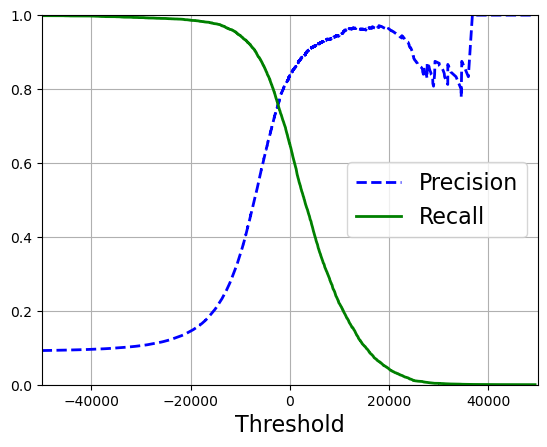

<Figure size 800x400 with 0 Axes>

In [87]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2) # plot precision as a function of the threshold
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2) # plot recall as a function of the threshold
    plt.legend(loc="center right", fontsize=16) # add a legend
    plt.xlabel("Threshold", fontsize=16)        # add x label
    plt.grid(True)                              # add grid
    plt.axis([-50000, 50000, 0, 1])             # set axis limits
    plt.figure(figsize=(8, 4))                      # set figure size

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
